In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import matplotlib.dates as md

In [325]:
df = pd.read_csv("../data/iiwase_log_abag_bias3_a_02.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

# df['time'] = df['time'].dt.time
# df['time'] = df['time'].astype(str)
# df[['date','time']]=df['time'].str.split(' ', 1,expand=True)
# df['time'] = pd.to_datetime(df['time'],format= '%H:%M:%S.%f').dt.time 
df.head()

,time,activity,stream,signal,value
0,2023-01-26 14:09:29.838,estimation,info,cart_x,0.000000
1,2023-01-26 14:09:29.838,estimation,info,cart_y,-0.834386
2,2023-01-26 14:09:29.838,estimation,info,cart_z,0.834386
3,2023-01-26 14:09:29.838,estimation,info,local_meas_jnt_pos0,0.000000
4,2023-01-26 14:09:29.838,estimation,info,local_meas_jnt_pos1,0.000000


In [326]:

df_cartx = df[df["signal"]=="cart_x"]
df_carty = df[df["signal"]=="cart_y"]
df_cartz = df[df["signal"]=="cart_z"]
df_cartx.head()


,time,activity,stream,signal,value
0,2023-01-26 14:09:29.838,estimation,info,cart_x,0.0
24,2023-01-26 14:09:29.846,estimation,info,cart_x,0.0
48,2023-01-26 14:09:29.854,estimation,info,cart_x,0.0
72,2023-01-26 14:09:29.862,estimation,info,cart_x,0.0
96,2023-01-26 14:09:29.870,estimation,info,cart_x,0.0


In [327]:
df_cartx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479 entries, 0 to 44032
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      1479 non-null   datetime64[ns]
 1   activity  1479 non-null   object        
 2   stream    1479 non-null   object        
 3   signal    1479 non-null   object        
 4   value     1479 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 69.3+ KB


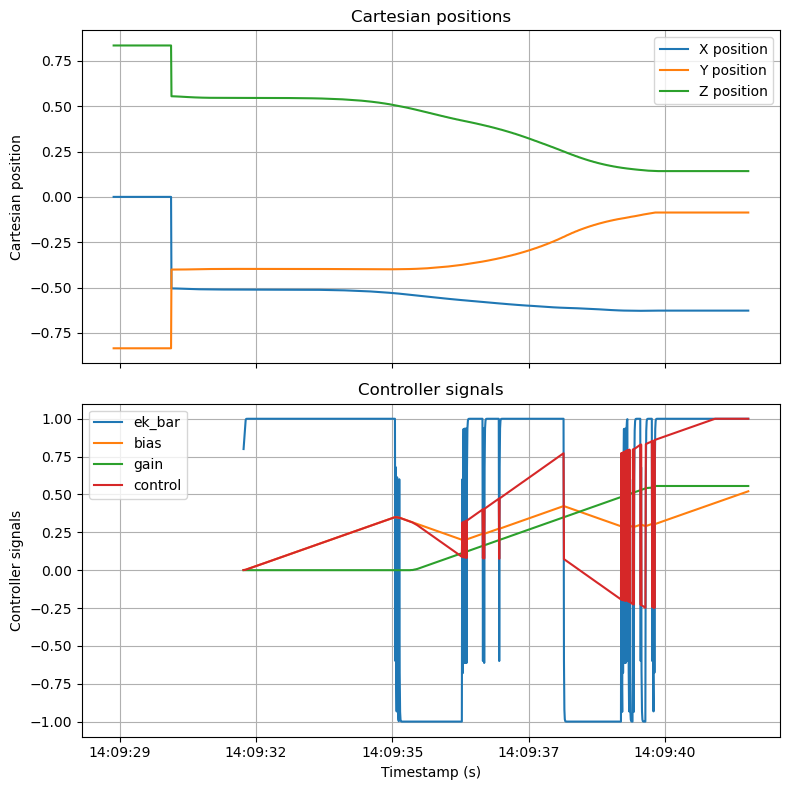

In [328]:
fig, [ax1,ax2] = plt.subplots(2, 1, figsize=(8, 8), sharex=True, squeeze=True)

ax1.plot(df_cartx["time"], df_cartx["value"], label="X position")
ax1.plot(df_carty["time"], df_carty["value"], label="Y position")
ax1.plot(df_cartz["time"], df_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df[df["signal"]=="ek_bar"]
df2 = df[df["signal"]=="bias"]
df3 = df[df["signal"]=="gain"]
df4 = df[df["signal"]=="control"]

ax2.plot(np.asarray(df1["time"], dtype='datetime64[ns]'), df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))
plt.tight_layout()

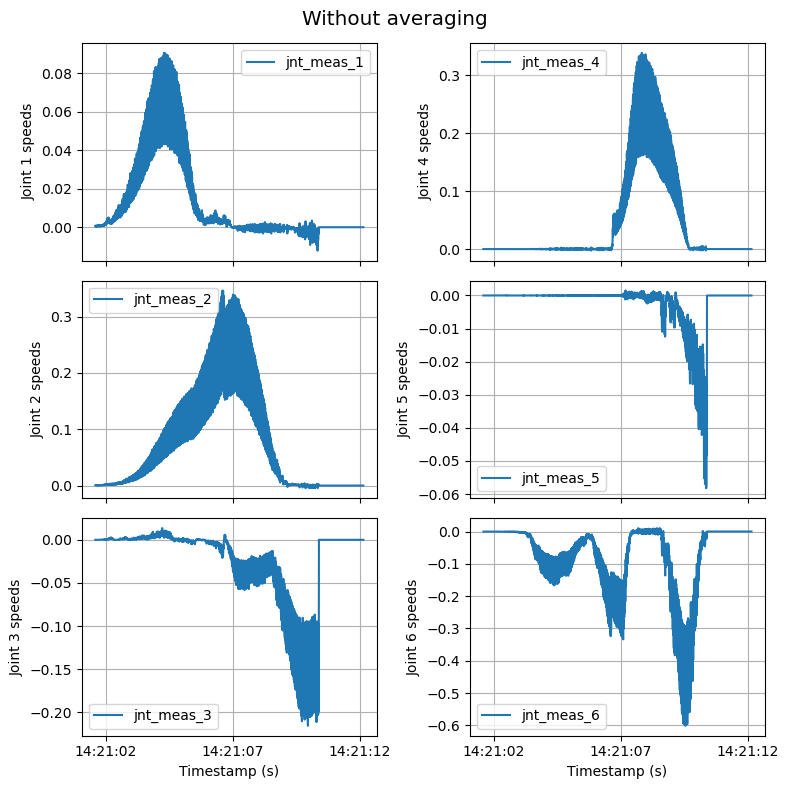

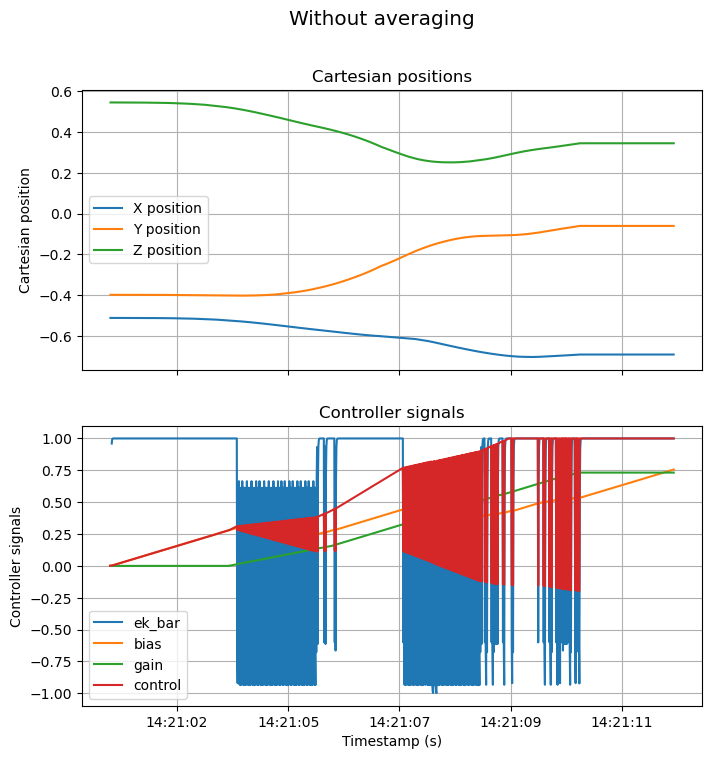

In [329]:
#Code with no averaging

df_no_avg = pd.read_csv("../data/iiwase_log_no_avg.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

#to get rid of the inconsistencies before controller turns on
df_controller = df_no_avg[df_no_avg["signal"]=="ek_bar"]
df_no_avg.drop(df_no_avg[df_no_avg['time'] <= df_controller["time"].iat[0]].index, inplace = True)

fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True, squeeze=True)
fig.suptitle("Without averaging", fontsize="x-large")

# Plotting the signals of the controller 
df_no_avg_jnt_meas_1 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel0"]
df_no_avg_jnt_meas_2 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel1"]
df_no_avg_jnt_meas_3 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel2"]
df_no_avg_jnt_meas_4 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel3"]
df_no_avg_jnt_meas_5 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel4"]
df_no_avg_jnt_meas_6 = df_no_avg[df_no_avg["signal"]=="meas_jnt_vel5"]

axs[0,0].plot(df_no_avg_jnt_meas_1["time"], df_no_avg_jnt_meas_1["value"], label='jnt_meas_1')
axs[1,0].plot(df_no_avg_jnt_meas_2["time"], df_no_avg_jnt_meas_2["value"], label='jnt_meas_2')
axs[2,0].plot(df_no_avg_jnt_meas_3["time"], df_no_avg_jnt_meas_3["value"], label='jnt_meas_3')
axs[0,1].plot(df_no_avg_jnt_meas_4["time"], df_no_avg_jnt_meas_4["value"], label='jnt_meas_4')
axs[1,1].plot(df_no_avg_jnt_meas_5["time"], df_no_avg_jnt_meas_5["value"], label='jnt_meas_5')
axs[2,1].plot(df_no_avg_jnt_meas_6["time"], df_no_avg_jnt_meas_6["value"], label='jnt_meas_6')

axs[0,0].legend()
axs[0,0].set(ylabel="Joint 1 speeds")
axs[0,0].grid(True)

axs[1,0].legend()
axs[1,0].set(ylabel="Joint 2 speeds")
axs[1,0].grid(True)

axs[2,0].legend()
axs[2,0].set(xlabel="Timestamp (s)", ylabel="Joint 3 speeds")
axs[2,0].grid(True)
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,0].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

axs[0,1].legend()
axs[0,1].set(ylabel="Joint 4 speeds")
axs[0,1].grid(True)

axs[1,1].legend()
axs[1,1].set(ylabel="Joint 5 speeds")
axs[1,1].grid(True)

axs[2,1].legend()
axs[2,1].set(xlabel="Timestamp (s)", ylabel="Joint 6 speeds")
axs[2,1].grid(True)
axs[2,1].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,1].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig.savefig("../docs/figs/velocity_averaging/jnt_vel_no_avg.svg", bbox_inches='tight')
plt.tight_layout()

fig2, [ax1,ax2] = plt.subplots(2, 1,figsize=(8, 8), sharex=True, squeeze=True)
fig2.suptitle("Without averaging", fontsize="x-large")
df_no_avg_cartx = df_no_avg[df_no_avg["signal"]=="cart_x"]
df_no_avg_carty = df_no_avg[df_no_avg["signal"]=="cart_y"]
df_no_avg_cartz = df_no_avg[df_no_avg["signal"]=="cart_z"]

ax1.plot(df_no_avg_cartx["time"], df_no_avg_cartx["value"], label="X position")
ax1.plot(df_no_avg_carty["time"], df_no_avg_carty["value"], label="Y position")
ax1.plot(df_no_avg_cartz["time"], df_no_avg_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df_no_avg[df_no_avg["signal"]=="ek_bar"]
df2 = df_no_avg[df_no_avg["signal"]=="bias"]
df3 = df_no_avg[df_no_avg["signal"]=="gain"]
df4 = df_no_avg[df_no_avg["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig2.savefig("../docs/figs/velocity_averaging/control_no_avg", bbox_inches='tight')


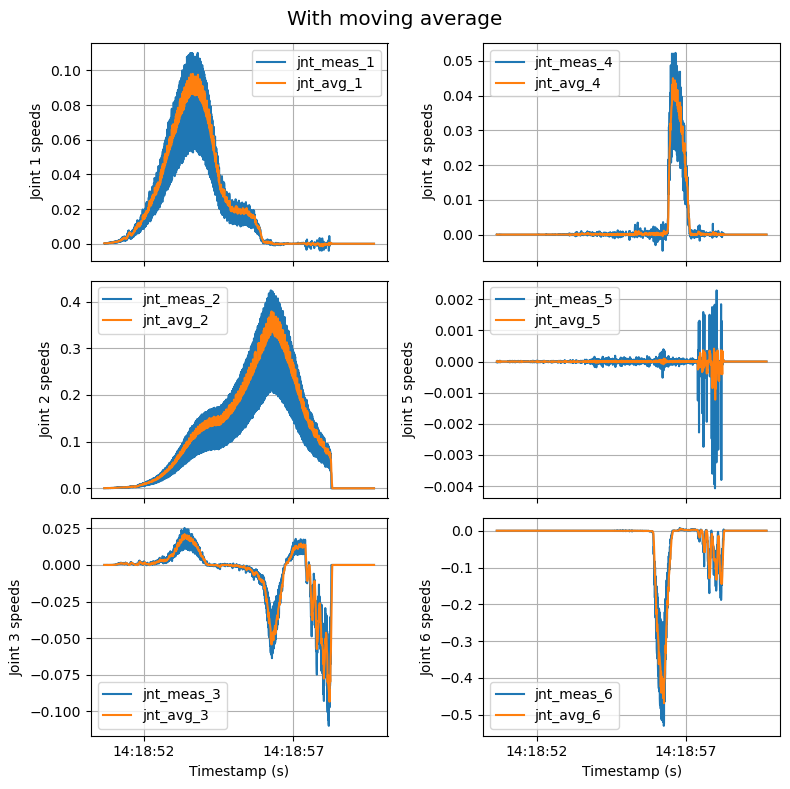

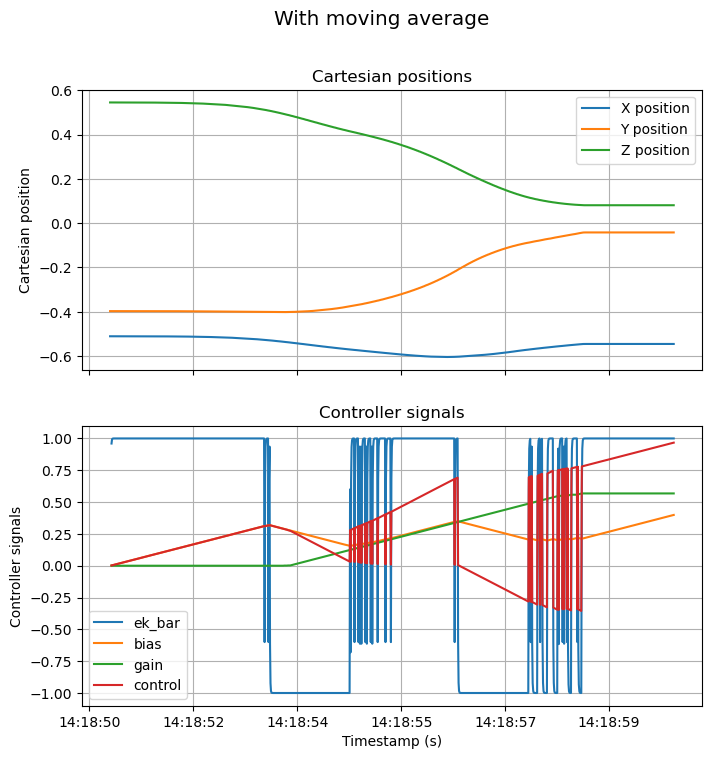

In [330]:
#Code to compare the averaging methods on the joint velocity estimation

df_moving_avg = pd.read_csv("../data/iiwase_log_moving_avg.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

#to get rid of the inconsistencies before controller turns on
df_controller = df_moving_avg[df_moving_avg["signal"]=="ek_bar"]
df_moving_avg.drop(df_moving_avg[df_moving_avg['time'] <= df_controller["time"].iat[0]].index, inplace = True)

fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True, squeeze=True)
fig.suptitle("With moving average", fontsize="x-large")

# Plotting the signals of the controller 
df_moving_avg_jnt_meas_1 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel0"]
df_moving_avg_jnt_meas_2 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel1"]
df_moving_avg_jnt_meas_3 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel2"]
df_moving_avg_jnt_meas_4 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel3"]
df_moving_avg_jnt_meas_5 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel4"]
df_moving_avg_jnt_meas_6 = df_moving_avg[df_moving_avg["signal"]=="meas_jnt_vel5"]

df_moving_avg_jnt_avg_1 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg0"]
df_moving_avg_jnt_avg_2 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg1"]
df_moving_avg_jnt_avg_3 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg2"]
df_moving_avg_jnt_avg_4 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg3"]
df_moving_avg_jnt_avg_5 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg4"]
df_moving_avg_jnt_avg_6 = df_moving_avg[df_moving_avg["signal"]=="jnt_vel_avg5"]

axs[0,0].plot(df_moving_avg_jnt_meas_1["time"], df_moving_avg_jnt_meas_1["value"], label='jnt_meas_1')
axs[1,0].plot(df_moving_avg_jnt_meas_2["time"], df_moving_avg_jnt_meas_2["value"], label='jnt_meas_2')
axs[2,0].plot(df_moving_avg_jnt_meas_3["time"], df_moving_avg_jnt_meas_3["value"], label='jnt_meas_3')
axs[0,1].plot(df_moving_avg_jnt_meas_4["time"], df_moving_avg_jnt_meas_4["value"], label='jnt_meas_4')
axs[1,1].plot(df_moving_avg_jnt_meas_5["time"], df_moving_avg_jnt_meas_5["value"], label='jnt_meas_5')
axs[2,1].plot(df_moving_avg_jnt_meas_6["time"], df_moving_avg_jnt_meas_6["value"], label='jnt_meas_6')

axs[0,0].plot(df_moving_avg_jnt_avg_1["time"], df_moving_avg_jnt_avg_1["value"], label='jnt_avg_1')
axs[1,0].plot(df_moving_avg_jnt_avg_2["time"], df_moving_avg_jnt_avg_2["value"], label='jnt_avg_2')
axs[2,0].plot(df_moving_avg_jnt_avg_3["time"], df_moving_avg_jnt_avg_3["value"], label='jnt_avg_3')
axs[0,1].plot(df_moving_avg_jnt_avg_4["time"], df_moving_avg_jnt_avg_4["value"], label='jnt_avg_4')
axs[1,1].plot(df_moving_avg_jnt_avg_5["time"], df_moving_avg_jnt_avg_5["value"], label='jnt_avg_5')
axs[2,1].plot(df_moving_avg_jnt_avg_6["time"], df_moving_avg_jnt_avg_6["value"], label='jnt_avg_6')

axs[0,0].legend()
axs[0,0].set(ylabel="Joint 1 speeds")
axs[0,0].grid(True)

axs[1,0].legend()
axs[1,0].set(ylabel="Joint 2 speeds")
axs[1,0].grid(True)

axs[2,0].legend()
axs[2,0].set(xlabel="Timestamp (s)", ylabel="Joint 3 speeds")
axs[2,0].grid(True)
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,0].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

axs[0,1].legend()
axs[0,1].set(ylabel="Joint 4 speeds")
axs[0,1].grid(True)

axs[1,1].legend()
axs[1,1].set(ylabel="Joint 5 speeds")
axs[1,1].grid(True)

axs[2,1].legend()
axs[2,1].set(xlabel="Timestamp (s)", ylabel="Joint 6 speeds")
axs[2,1].grid(True)
axs[2,1].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,1].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

plt.tight_layout()
fig.savefig("../docs/figs/velocity_averaging/jnt_vel_moving_avg.svg", bbox_inches='tight')

fig2, [ax1,ax2] = plt.subplots(2, 1,figsize=(8, 8), sharex=True, squeeze=True)
fig2.suptitle("With moving average", fontsize="x-large")
df_moving_avg_cartx = df_moving_avg[df_moving_avg["signal"]=="cart_x"]
df_moving_avg_carty = df_moving_avg[df_moving_avg["signal"]=="cart_y"]
df_moving_avg_cartz = df_moving_avg[df_moving_avg["signal"]=="cart_z"]

ax1.plot(df_moving_avg_cartx["time"], df_moving_avg_cartx["value"], label="X position")
ax1.plot(df_moving_avg_carty["time"], df_moving_avg_carty["value"], label="Y position")
ax1.plot(df_moving_avg_cartz["time"], df_moving_avg_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df_moving_avg[df_moving_avg["signal"]=="ek_bar"]
df2 = df_moving_avg[df_moving_avg["signal"]=="bias"]
df3 = df_moving_avg[df_moving_avg["signal"]=="gain"]
df4 = df_moving_avg[df_moving_avg["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))\

fig2.savefig("../docs/figs/velocity_averaging/control_moving_avg", bbox_inches='tight')


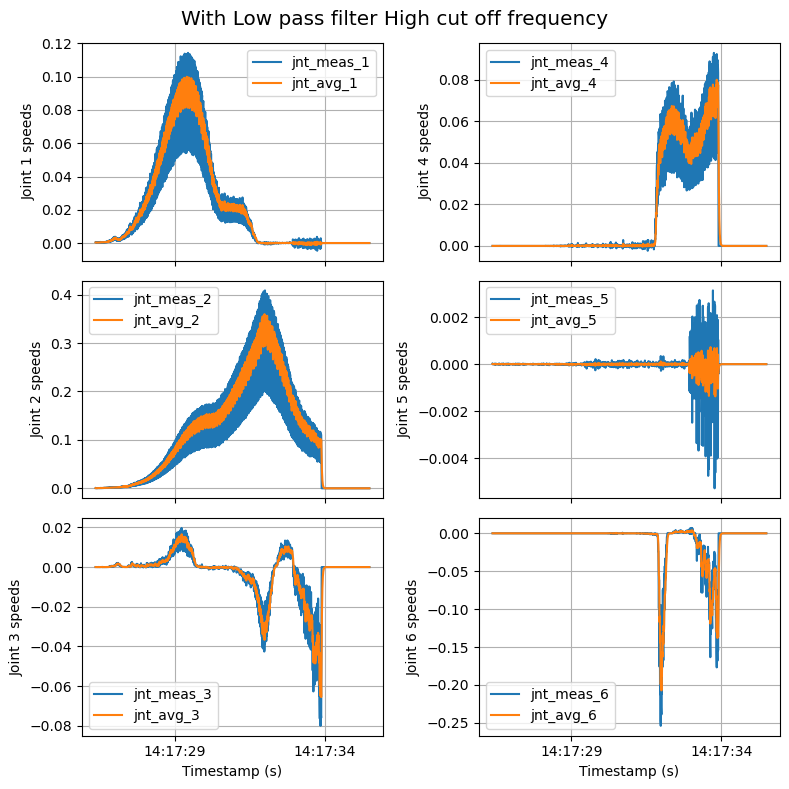

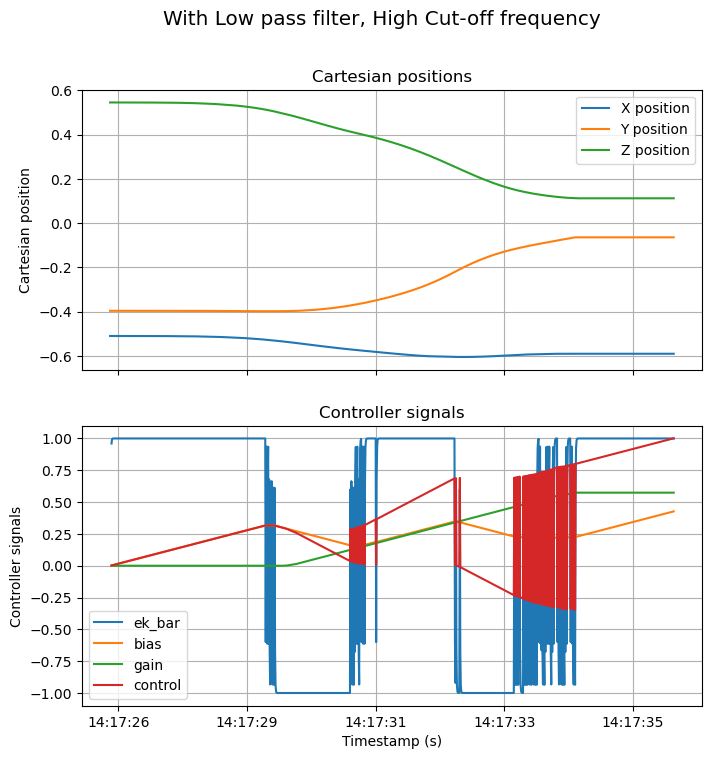

In [331]:
#Code to compare the averaging methods on the joint velocity estimation

df_lp_1_3 = pd.read_csv("../data/iiwase_log_lp_1_3.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

#to get rid of the inconsistencies before controller turns on
df_controller = df_lp_1_3[df_lp_1_3["signal"]=="ek_bar"]
df_lp_1_3.drop(df_lp_1_3[df_lp_1_3['time'] <= df_controller["time"].iat[0]].index, inplace = True)

fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True, squeeze=True)
fig.suptitle("With Low pass filter High cut off frequency", fontsize="x-large")

# Plotting the signals of the controller 
df_lp_1_3_jnt_meas_1 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel0"]
df_lp_1_3_jnt_meas_2 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel1"]
df_lp_1_3_jnt_meas_3 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel2"]
df_lp_1_3_jnt_meas_4 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel3"]
df_lp_1_3_jnt_meas_5 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel4"]
df_lp_1_3_jnt_meas_6 = df_lp_1_3[df_lp_1_3["signal"]=="meas_jnt_vel5"]

df_lp_1_3_jnt_avg_1 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg0"]
df_lp_1_3_jnt_avg_2 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg1"]
df_lp_1_3_jnt_avg_3 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg2"]
df_lp_1_3_jnt_avg_4 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg3"]
df_lp_1_3_jnt_avg_5 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg4"]
df_lp_1_3_jnt_avg_6 = df_lp_1_3[df_lp_1_3["signal"]=="jnt_vel_avg5"]

axs[0,0].plot(df_lp_1_3_jnt_meas_1["time"], df_lp_1_3_jnt_meas_1["value"], label='jnt_meas_1')
axs[1,0].plot(df_lp_1_3_jnt_meas_2["time"], df_lp_1_3_jnt_meas_2["value"], label='jnt_meas_2')
axs[2,0].plot(df_lp_1_3_jnt_meas_3["time"], df_lp_1_3_jnt_meas_3["value"], label='jnt_meas_3')
axs[0,1].plot(df_lp_1_3_jnt_meas_4["time"], df_lp_1_3_jnt_meas_4["value"], label='jnt_meas_4')
axs[1,1].plot(df_lp_1_3_jnt_meas_5["time"], df_lp_1_3_jnt_meas_5["value"], label='jnt_meas_5')
axs[2,1].plot(df_lp_1_3_jnt_meas_6["time"], df_lp_1_3_jnt_meas_6["value"], label='jnt_meas_6')

axs[0,0].plot(df_lp_1_3_jnt_avg_1["time"], df_lp_1_3_jnt_avg_1["value"], label='jnt_avg_1')
axs[1,0].plot(df_lp_1_3_jnt_avg_2["time"], df_lp_1_3_jnt_avg_2["value"], label='jnt_avg_2')
axs[2,0].plot(df_lp_1_3_jnt_avg_3["time"], df_lp_1_3_jnt_avg_3["value"], label='jnt_avg_3')
axs[0,1].plot(df_lp_1_3_jnt_avg_4["time"], df_lp_1_3_jnt_avg_4["value"], label='jnt_avg_4')
axs[1,1].plot(df_lp_1_3_jnt_avg_5["time"], df_lp_1_3_jnt_avg_5["value"], label='jnt_avg_5')
axs[2,1].plot(df_lp_1_3_jnt_avg_6["time"], df_lp_1_3_jnt_avg_6["value"], label='jnt_avg_6')

axs[0,0].legend()
axs[0,0].set(ylabel="Joint 1 speeds")
axs[0,0].grid(True)

axs[1,0].legend()
axs[1,0].set(ylabel="Joint 2 speeds")
axs[1,0].grid(True)

axs[2,0].legend()
axs[2,0].set(xlabel="Timestamp (s)", ylabel="Joint 3 speeds")
axs[2,0].grid(True)
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,0].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

axs[0,1].legend()
axs[0,1].set(ylabel="Joint 4 speeds")
axs[0,1].grid(True)

axs[1,1].legend()
axs[1,1].set(ylabel="Joint 5 speeds")
axs[1,1].grid(True)

axs[2,1].legend()
axs[2,1].set(xlabel="Timestamp (s)", ylabel="Joint 6 speeds")
axs[2,1].grid(True)
axs[2,1].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,1].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

plt.tight_layout()
fig.savefig("../docs/figs/velocity_averaging/jnt_vel_lp_high.svg", bbox_inches='tight')

# Controller signals
fig2, [ax1,ax2] = plt.subplots(2, 1,figsize=(8, 8), sharex=True, squeeze=True)
fig2.suptitle("With Low pass filter, High Cut-off frequency", fontsize="x-large")
df_lp_1_3_cartx = df_lp_1_3[df_lp_1_3["signal"]=="cart_x"]
df_lp_1_3_carty = df_lp_1_3[df_lp_1_3["signal"]=="cart_y"]
df_lp_1_3_cartz = df_lp_1_3[df_lp_1_3["signal"]=="cart_z"]

ax1.plot(df_lp_1_3_cartx["time"], df_lp_1_3_cartx["value"], label="X position")
ax1.plot(df_lp_1_3_carty["time"], df_lp_1_3_carty["value"], label="Y position")
ax1.plot(df_lp_1_3_cartz["time"], df_lp_1_3_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df_lp_1_3[df_lp_1_3["signal"]=="ek_bar"]
df2 = df_lp_1_3[df_lp_1_3["signal"]=="bias"]
df3 = df_lp_1_3[df_lp_1_3["signal"]=="gain"]
df4 = df_lp_1_3[df_lp_1_3["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))\

fig2.savefig("../docs/figs/velocity_averaging/control_lp_high", bbox_inches='tight')

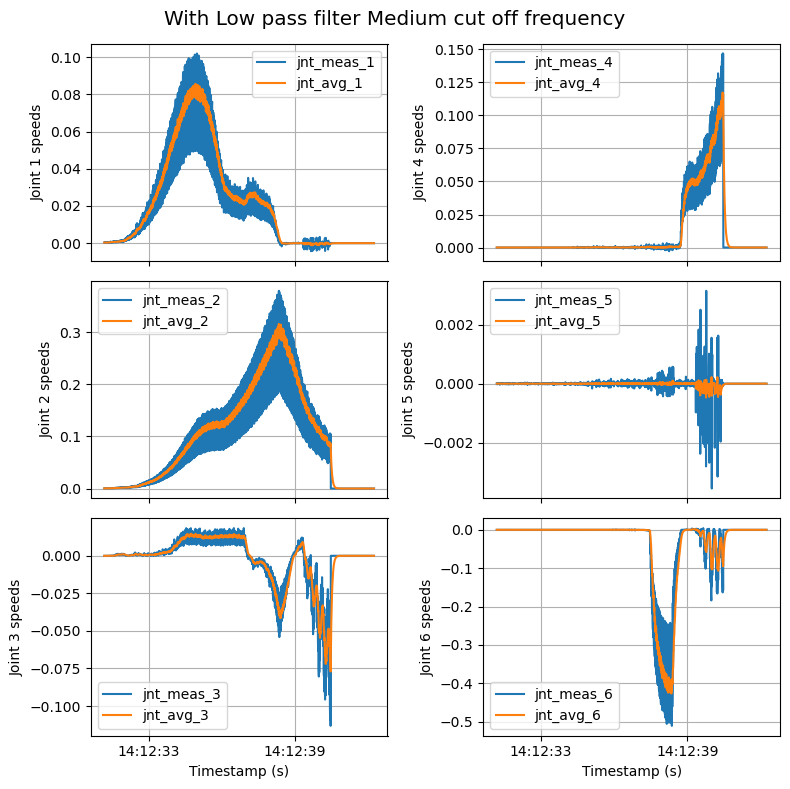

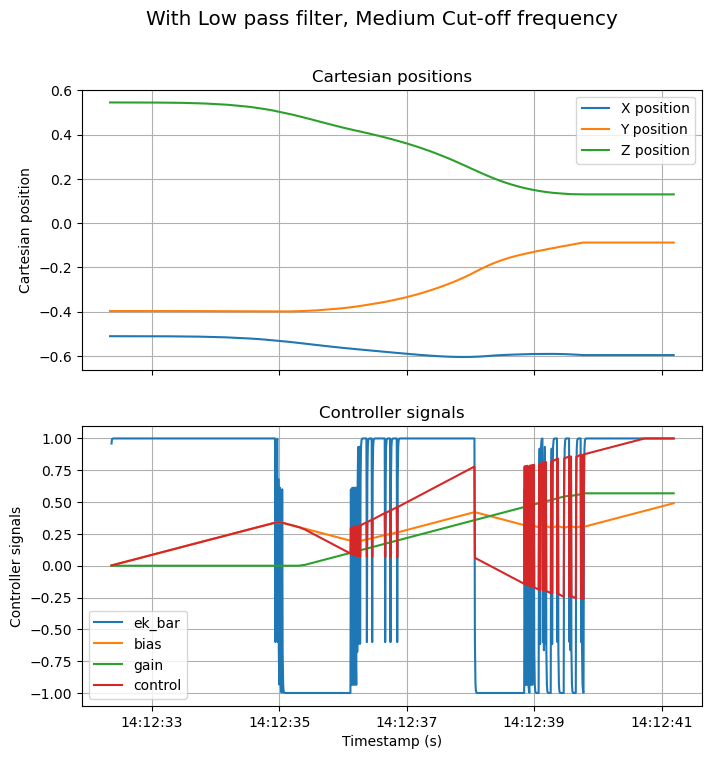

In [332]:
#Code to compare the averaging methods on the joint velocity estimation

df_lp_1_6 = pd.read_csv("../data/iiwase_log_lp_1_6.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

#to get rid of the inconsistencies before controller turns on
df_controller = df_lp_1_6[df_lp_1_6["signal"]=="ek_bar"]
df_lp_1_6.drop(df_lp_1_6[df_lp_1_6['time'] <= df_controller["time"].iat[0]].index, inplace = True)

fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True, squeeze=True)
fig.suptitle("With Low pass filter Medium cut off frequency", fontsize="x-large")


# Plotting the signals of the controller 
df_lp_1_6_jnt_meas_1 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel0"]
df_lp_1_6_jnt_meas_2 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel1"]
df_lp_1_6_jnt_meas_3 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel2"]
df_lp_1_6_jnt_meas_4 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel3"]
df_lp_1_6_jnt_meas_5 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel4"]
df_lp_1_6_jnt_meas_6 = df_lp_1_6[df_lp_1_6["signal"]=="meas_jnt_vel5"]

df_lp_1_6_jnt_avg_1 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg0"]
df_lp_1_6_jnt_avg_2 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg1"]
df_lp_1_6_jnt_avg_3 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg2"]
df_lp_1_6_jnt_avg_4 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg3"]
df_lp_1_6_jnt_avg_5 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg4"]
df_lp_1_6_jnt_avg_6 = df_lp_1_6[df_lp_1_6["signal"]=="jnt_vel_avg5"]

axs[0,0].plot(df_lp_1_6_jnt_meas_1["time"], df_lp_1_6_jnt_meas_1["value"], label='jnt_meas_1')
axs[1,0].plot(df_lp_1_6_jnt_meas_2["time"], df_lp_1_6_jnt_meas_2["value"], label='jnt_meas_2')
axs[2,0].plot(df_lp_1_6_jnt_meas_3["time"], df_lp_1_6_jnt_meas_3["value"], label='jnt_meas_3')
axs[0,1].plot(df_lp_1_6_jnt_meas_4["time"], df_lp_1_6_jnt_meas_4["value"], label='jnt_meas_4')
axs[1,1].plot(df_lp_1_6_jnt_meas_5["time"], df_lp_1_6_jnt_meas_5["value"], label='jnt_meas_5')
axs[2,1].plot(df_lp_1_6_jnt_meas_6["time"], df_lp_1_6_jnt_meas_6["value"], label='jnt_meas_6')

axs[0,0].plot(df_lp_1_6_jnt_avg_1["time"], df_lp_1_6_jnt_avg_1["value"], label='jnt_avg_1')
axs[1,0].plot(df_lp_1_6_jnt_avg_2["time"], df_lp_1_6_jnt_avg_2["value"], label='jnt_avg_2')
axs[2,0].plot(df_lp_1_6_jnt_avg_3["time"], df_lp_1_6_jnt_avg_3["value"], label='jnt_avg_3')
axs[0,1].plot(df_lp_1_6_jnt_avg_4["time"], df_lp_1_6_jnt_avg_4["value"], label='jnt_avg_4')
axs[1,1].plot(df_lp_1_6_jnt_avg_5["time"], df_lp_1_6_jnt_avg_5["value"], label='jnt_avg_5')
axs[2,1].plot(df_lp_1_6_jnt_avg_6["time"], df_lp_1_6_jnt_avg_6["value"], label='jnt_avg_6')

axs[0,0].legend()
axs[0,0].set(ylabel="Joint 1 speeds")
axs[0,0].grid(True)

axs[1,0].legend()
axs[1,0].set(ylabel="Joint 2 speeds")
axs[1,0].grid(True)

axs[2,0].legend()
axs[2,0].set(xlabel="Timestamp (s)", ylabel="Joint 3 speeds")
axs[2,0].grid(True)
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,0].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

axs[0,1].legend()
axs[0,1].set(ylabel="Joint 4 speeds")
axs[0,1].grid(True)

axs[1,1].legend()
axs[1,1].set(ylabel="Joint 5 speeds")
axs[1,1].grid(True)

axs[2,1].legend()
axs[2,1].set(xlabel="Timestamp (s)", ylabel="Joint 6 speeds")
axs[2,1].grid(True)
axs[2,1].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,1].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

plt.tight_layout()
fig.savefig("../docs/figs/velocity_averaging/jnt_vel_lp_mid.svg", bbox_inches='tight')

# Controller signals
fig2, [ax1,ax2] = plt.subplots(2, 1,figsize=(8, 8), sharex=True, squeeze=True)
fig2.suptitle("With Low pass filter, Medium Cut-off frequency", fontsize="x-large")
df_lp_1_6_cartx = df_lp_1_6[df_lp_1_6["signal"]=="cart_x"]
df_lp_1_6_carty = df_lp_1_6[df_lp_1_6["signal"]=="cart_y"]
df_lp_1_6_cartz = df_lp_1_6[df_lp_1_6["signal"]=="cart_z"]

ax1.plot(df_lp_1_6_cartx["time"], df_lp_1_6_cartx["value"], label="X position")
ax1.plot(df_lp_1_6_carty["time"], df_lp_1_6_carty["value"], label="Y position")
ax1.plot(df_lp_1_6_cartz["time"], df_lp_1_6_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df_lp_1_6[df_lp_1_6["signal"]=="ek_bar"]
df2 = df_lp_1_6[df_lp_1_6["signal"]=="bias"]
df3 = df_lp_1_6[df_lp_1_6["signal"]=="gain"]
df4 = df_lp_1_6[df_lp_1_6["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig2.savefig("../docs/figs/velocity_averaging/control_lp_mid", bbox_inches='tight')

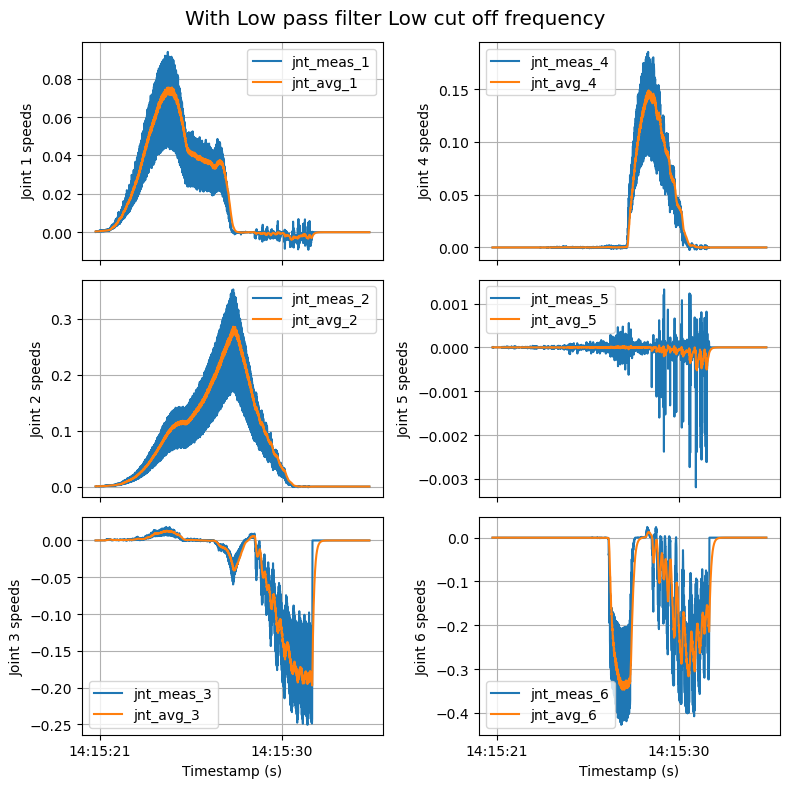

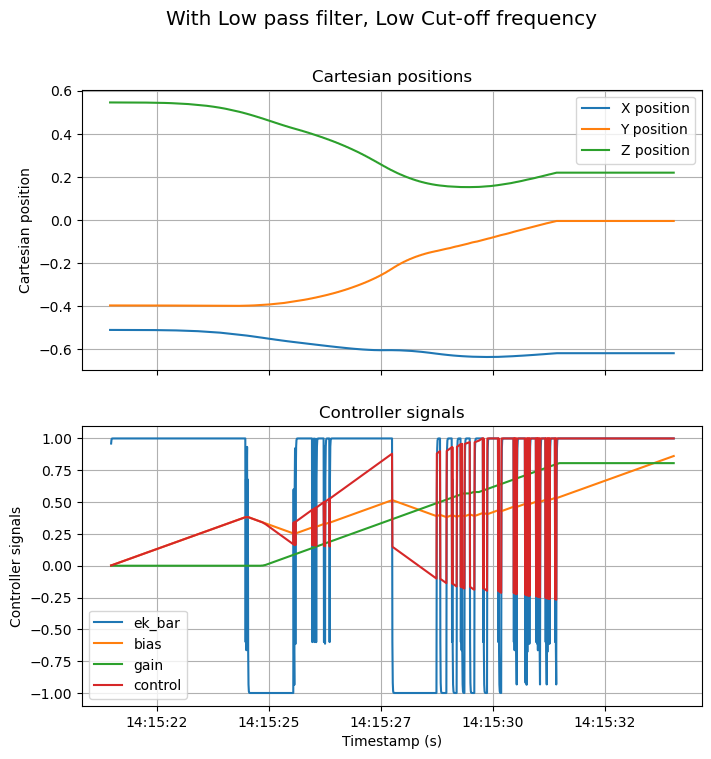

In [333]:
#Code to compare the averaging methods on the joint velocity estimation

df_lp_1_11 = pd.read_csv("../data/iiwase_log_lp_1_11.csv", header=None, 
                names=["time", "activity", "stream", "signal", "value"], parse_dates=["time"])

#to get rid of the inconsistencies before controller turns on
df_controller = df_lp_1_11[df_lp_1_11["signal"]=="ek_bar"]
df_lp_1_11.drop(df_lp_1_11[df_lp_1_11['time'] <= df_controller["time"].iat[0]].index, inplace = True)

fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True, squeeze=True)
fig.suptitle("With Low pass filter Low cut off frequency", fontsize="x-large")

# Plotting the signals of the controller 
df_lp_1_11_jnt_meas_1 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel0"]
df_lp_1_11_jnt_meas_2 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel1"]
df_lp_1_11_jnt_meas_3 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel2"]
df_lp_1_11_jnt_meas_4 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel3"]
df_lp_1_11_jnt_meas_5 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel4"]
df_lp_1_11_jnt_meas_6 = df_lp_1_11[df_lp_1_11["signal"]=="meas_jnt_vel5"]

df_lp_1_11_jnt_avg_1 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg0"]
df_lp_1_11_jnt_avg_2 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg1"]
df_lp_1_11_jnt_avg_3 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg2"]
df_lp_1_11_jnt_avg_4 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg3"]
df_lp_1_11_jnt_avg_5 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg4"]
df_lp_1_11_jnt_avg_6 = df_lp_1_11[df_lp_1_11["signal"]=="jnt_vel_avg5"]

axs[0,0].plot(df_lp_1_11_jnt_meas_1["time"], df_lp_1_11_jnt_meas_1["value"], label='jnt_meas_1')
axs[1,0].plot(df_lp_1_11_jnt_meas_2["time"], df_lp_1_11_jnt_meas_2["value"], label='jnt_meas_2')
axs[2,0].plot(df_lp_1_11_jnt_meas_3["time"], df_lp_1_11_jnt_meas_3["value"], label='jnt_meas_3')
axs[0,1].plot(df_lp_1_11_jnt_meas_4["time"], df_lp_1_11_jnt_meas_4["value"], label='jnt_meas_4')
axs[1,1].plot(df_lp_1_11_jnt_meas_5["time"], df_lp_1_11_jnt_meas_5["value"], label='jnt_meas_5')
axs[2,1].plot(df_lp_1_11_jnt_meas_6["time"], df_lp_1_11_jnt_meas_6["value"], label='jnt_meas_6')

axs[0,0].plot(df_lp_1_11_jnt_avg_1["time"], df_lp_1_11_jnt_avg_1["value"], label='jnt_avg_1')
axs[1,0].plot(df_lp_1_11_jnt_avg_2["time"], df_lp_1_11_jnt_avg_2["value"], label='jnt_avg_2')
axs[2,0].plot(df_lp_1_11_jnt_avg_3["time"], df_lp_1_11_jnt_avg_3["value"], label='jnt_avg_3')
axs[0,1].plot(df_lp_1_11_jnt_avg_4["time"], df_lp_1_11_jnt_avg_4["value"], label='jnt_avg_4')
axs[1,1].plot(df_lp_1_11_jnt_avg_5["time"], df_lp_1_11_jnt_avg_5["value"], label='jnt_avg_5')
axs[2,1].plot(df_lp_1_11_jnt_avg_6["time"], df_lp_1_11_jnt_avg_6["value"], label='jnt_avg_6')

axs[0,0].legend()
axs[0,0].set(ylabel="Joint 1 speeds")
axs[0,0].grid(True)

axs[1,0].legend()
axs[1,0].set(ylabel="Joint 2 speeds")
axs[1,0].grid(True)

axs[2,0].legend()
axs[2,0].set(xlabel="Timestamp (s)", ylabel="Joint 3 speeds")
axs[2,0].grid(True)
axs[2,0].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,0].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

axs[0,1].legend()
axs[0,1].set(ylabel="Joint 4 speeds")
axs[0,1].grid(True)

axs[1,1].legend()
axs[1,1].set(ylabel="Joint 5 speeds")
axs[1,1].grid(True)

axs[2,1].legend()
axs[2,1].set(xlabel="Timestamp (s)", ylabel="Joint 6 speeds")
axs[2,1].grid(True)
axs[2,1].xaxis.set_major_locator(plt.MaxNLocator(2))
axs[2,1].xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

plt.tight_layout()
fig.savefig("../docs/figs/velocity_averaging/jnt_vel_lp_low.svg", bbox_inches='tight')

# Controller signals
fig2, [ax1,ax2] = plt.subplots(2, 1,figsize=(8, 8), sharex=True, squeeze=True)
fig2.suptitle("With Low pass filter, Low Cut-off frequency", fontsize="x-large")
df_lp_1_11_cartx = df_lp_1_11[df_lp_1_11["signal"]=="cart_x"]
df_lp_1_11_carty = df_lp_1_11[df_lp_1_11["signal"]=="cart_y"]
df_lp_1_11_cartz = df_lp_1_11[df_lp_1_11["signal"]=="cart_z"]

ax1.plot(df_lp_1_11_cartx["time"], df_lp_1_11_cartx["value"], label="X position")
ax1.plot(df_lp_1_11_carty["time"], df_lp_1_11_carty["value"], label="Y position")
ax1.plot(df_lp_1_11_cartz["time"], df_lp_1_11_cartz["value"], label="Z position")

ax1.legend()

ax1.set(ylabel="Cartesian position", title="Cartesian positions")
ax1.grid(True)

#fig.savefig("../docs/figs/jnt_vel_signal.svg", bbox_inches='tight')

# Plotting the signals of the controller 
df1 = df_lp_1_11[df_lp_1_11["signal"]=="ek_bar"]
df2 = df_lp_1_11[df_lp_1_11["signal"]=="bias"]
df3 = df_lp_1_11[df_lp_1_11["signal"]=="gain"]
df4 = df_lp_1_11[df_lp_1_11["signal"]=="control"]

ax2.plot(df1["time"], df1["value"], label='ek_bar')
ax2.plot(df2["time"], df2["value"], label='bias')
ax2.plot(df3["time"], df3["value"], label='gain')
ax2.plot(df4["time"], df4["value"], label='control')

ax2.legend()
ax2.set(xlabel="Timestamp (s)", ylabel="Controller signals", title="Controller signals")
ax2.grid(True)
ax2.xaxis.set_major_locator(plt.MaxNLocator(6))
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M:%S'))

fig2.savefig("../docs/figs/velocity_averaging/control_lp_low", bbox_inches='tight')